In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot 

# jupyter setting
init_notebook_mode(connected = True)

In [ ]:
sns.heatmap(tr.isnull(),yticklabels=False)

## Numeric features

In [3]:
tr_num = pd.read_csv('data/train_num.csv')

In [5]:
tr_num.describe()

,id,budget,popularity,runtime,revenue,runtime_h,runtime_m,revenue_log,runtime_log,budget_log,popularity_log
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03,2998.000000,2998.000000,3000.000000,2998.000000,3000.000000,3.000000e+03
mean,1500.500000,2.266135e+07,8.463274,107.856571,6.668176e+07,1.240494,33.426951,15.972774,4.658456,11.961359,1.975396e+00
std,866.169729,3.702662e+07,12.104000,22.086434,1.375149e+08,0.466282,15.521343,3.035788,0.346679,7.403049,7.416869e-01
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00,0.000000,0.000000,0.693147,0.000000,0.000000,9.999995e-07
25%,750.750000,0.000000e+00,4.018053,94.000000,2.401550e+06,1.000000,25.000000,14.691625,4.553877,0.000000,1.613042e+00
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07,1.000000,36.000000,16.637310,4.653960,15.894952,2.125233e+00
75%,2250.250000,3.000000e+07,10.890983,118.000000,6.877599e+07,1.000000,45.000000,18.046365,4.779123,17.216708,2.475780e+00
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09,5.000000,59.000000,21.141685,5.826000,19.755682,5.688117e+00


C:\Users\jjone\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in greater

C:\Users\jjone\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in less

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



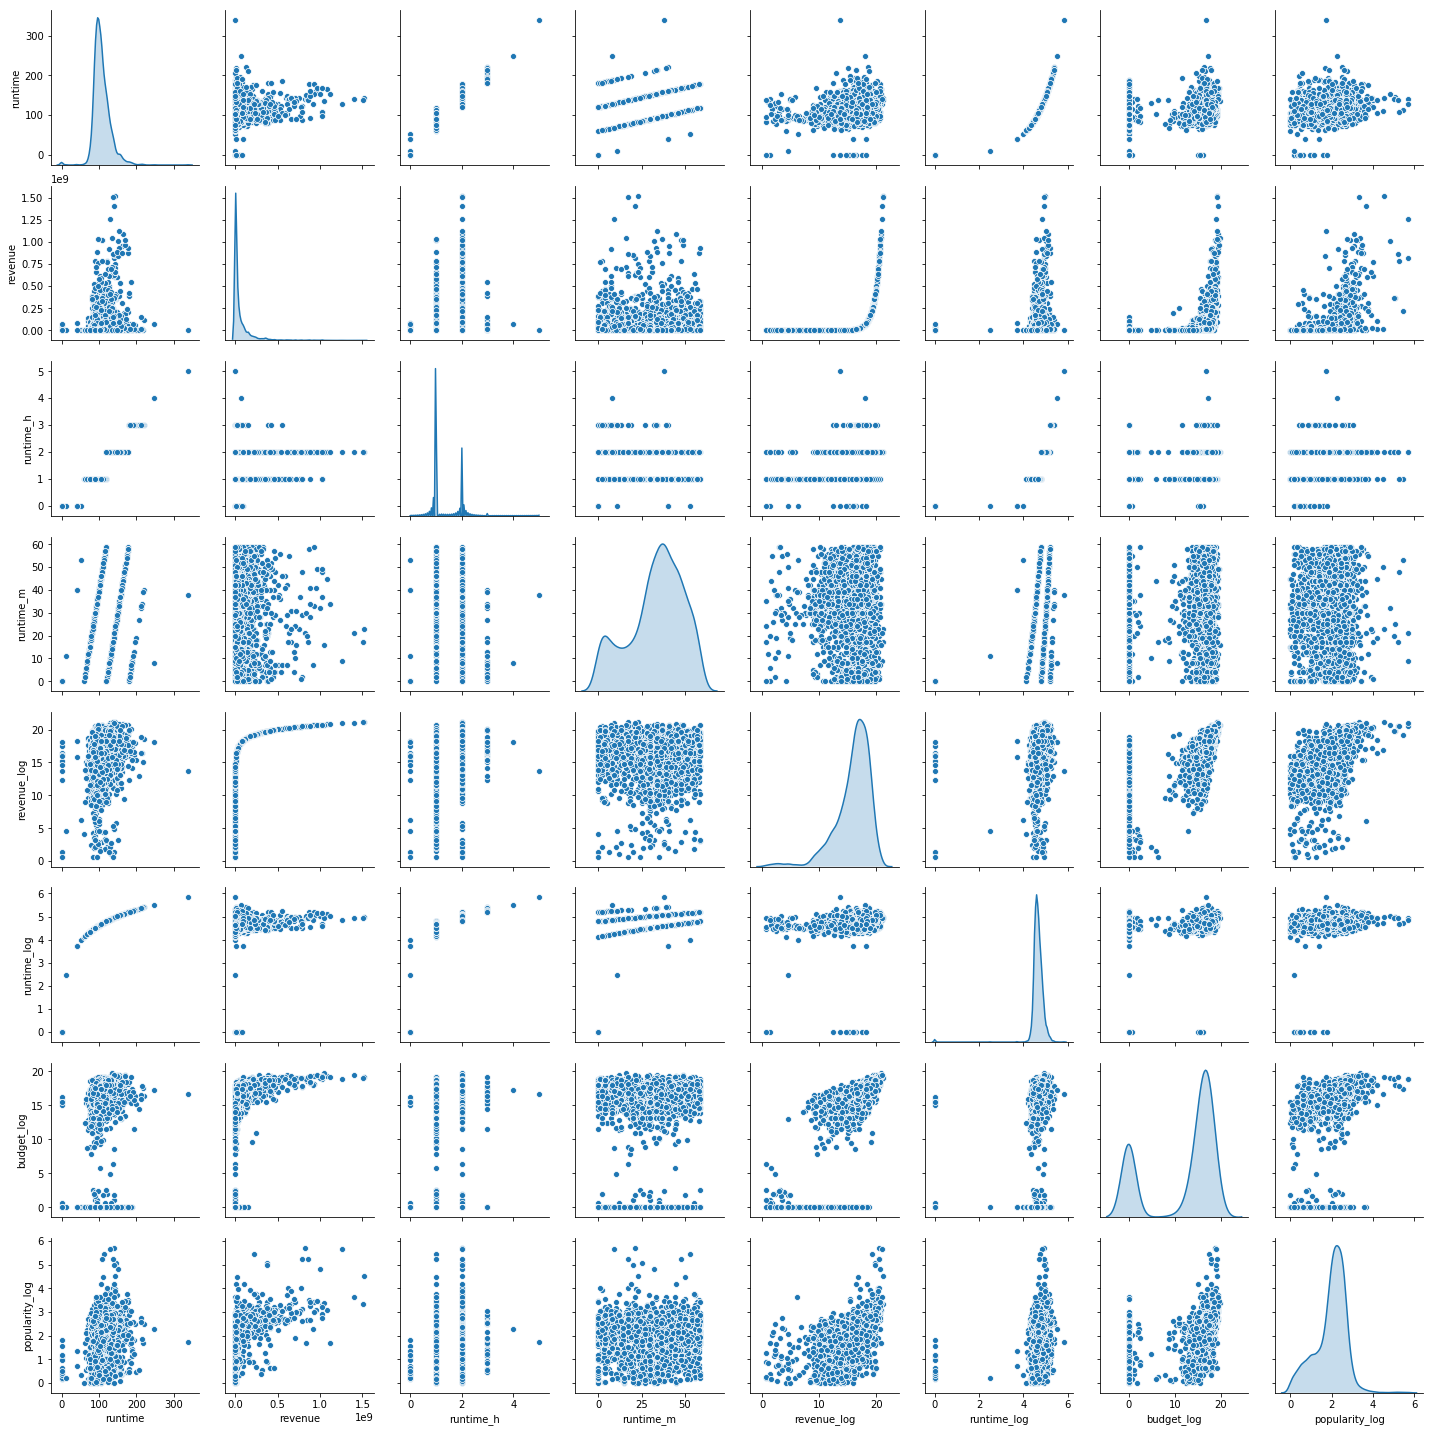

In [7]:
sns.pairplot(tr_num.iloc[:, 3:11], diag_kind = 'kde')

## Categorical features

### genres

In [205]:
tr_cat = pd.read_csv('data/train_cat.csv')
tr_cat.columns

Index(['genres', 'original_language', 'production_companies',
       'production_countries', 'release_date', 'spoken_languages', 'status',
       'is_collection', 'is_homepage', 'n_genres', 'n_prod_comp',
       'n_prod_count', 'n_spoken_lang', 'n_cast', 'crew_job', 'n_crew',
       'n_crew_job', 'year', 'month', 'day', 'weekofday', 'quarter',
       'revenue'],
      dtype='object')

In [211]:
tr_cat['revenue_log'] = np.log1p(tr_cat.revenue)

In [127]:
tr_cat['genres'] = tr_cat.genres.map(lambda row: row.split(';')[:-1])

In [128]:
tr_cat.head()

,genres,original_language,production_companies,production_countries,release_date,spoken_languages,status,is_collection,is_homepage,n_genres,...,crew_job,n_crew,n_crew_job,year,month,day,weekofday,quarter,revenue,revenue_log
0,[Comedy],en,Paramount Pictures;United Artists;Metro-Goldwy...,US;,2015-02-20,en;,Released,True,False,1,...,First Assistant Director;Director;Writer;Chara...,72,59,2015,2,20,4,1,12314651,16.326300
1,"[Comedy, Drama, Family, Romance]",en,Walt Disney Pictures;,US;,2004-08-06,en;,Released,True,False,4,...,Director;Director of Photography;Original Musi...,9,7,2004,8,6,4,3,95149435,18.370959
2,[Drama],en,Bold Films;Blumhouse Productions;Right of Way ...,US;,2014-10-10,en;,Released,False,True,1,...,Casting;Music Editor;Executive In Charge Of Pr...,64,46,2014,10,10,4,4,13092000,16.387512
3,"[Thriller, Drama]",hi,NaN,IN;,2012-03-09,en;hi;,Released,False,True,2,...,Director;Producer;Writer;,3,3,2012,3,9,4,1,16000000,16.588099
4,"[Action, Thriller]",ko,NaN,KR;,2009-02-05,ko;,Released,False,False,2,...,Director;Writer;,2,2,2009,2,5,3,1,3923970,15.182615


In [129]:
mlb = MultiLabelBinarizer()
X = mlb.fit_transform(tr_cat.genres).astype('int')

In [130]:
mlb.classes_

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], dtype=object)

In [131]:
df_genres = pd.DataFrame(X, columns = mlb.classes_)

In [132]:
df_genres = pd.concat([df_genres, tr_cat.revenue_log], axis = 1)

In [133]:
df_genres.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,revenue_log
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.326300
1,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,18.370959
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,16.387512
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,16.588099
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,15.182615


In [134]:
df_genres.iloc[:, :-1].sum(axis = 0).sort_values()

TV Movie              1
Foreign              31
Western              43
Documentary          87
War                 100
Music               100
History             132
Animation           141
Mystery             226
Fantasy             233
Family              260
Science Fiction     290
Horror              301
Adventure           440
Crime               469
Romance             573
Action              742
Thriller            790
Comedy             1030
Drama              1535
dtype: int64

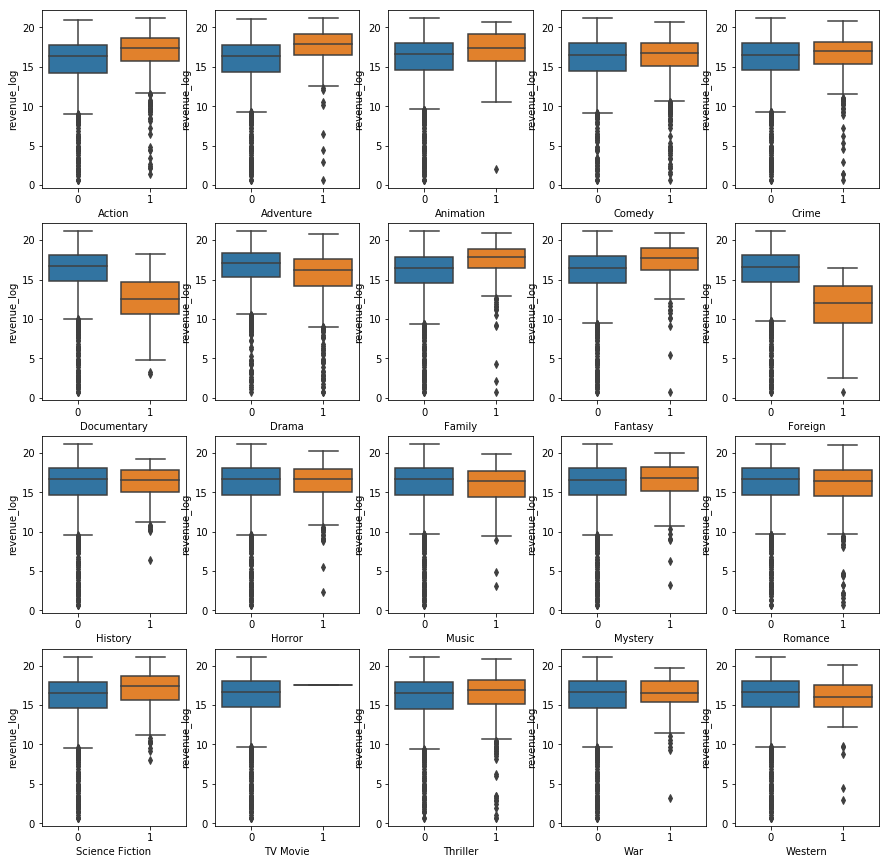

In [193]:
plt.figure(figsize = (15, 15))
for i in range(len(df_genres.columns[:-1])):
    plt.subplot(4, 5, i+1)
    sns.boxplot(x = df_genres.iloc[:, i], y = df_genres.revenue_log)
plt.show()

In [ ]:
# Mean encoding





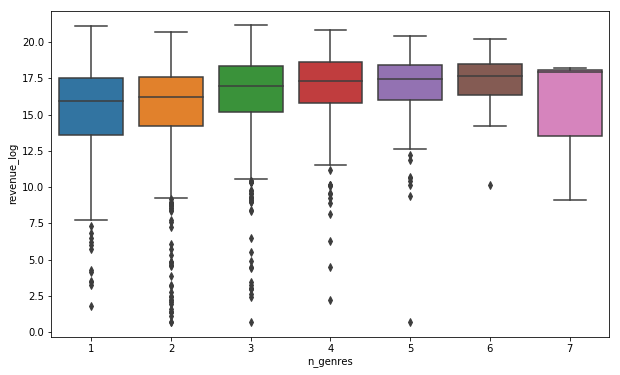

In [136]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = tr_cat.n_genres, y = tr_cat.revenue_log)

In [137]:
tr_cat.groupby(tr_cat.n_genres)['revenue_log'].mean()

n_genres
1    15.258256
2    15.519933
3    16.404852
4    16.907222
5    16.763969
6    17.152661
7    15.088890
Name: revenue_log, dtype: float64

### production countries

In [138]:
tr_cat.groupby(tr_cat.n_prod_count)['revenue_log'].mean()

n_prod_count
0    12.239776
1    15.972531
2    16.284170
3    16.114978
4    16.674441
5    15.507304
6    14.305069
8    16.634289
Name: revenue_log, dtype: float64

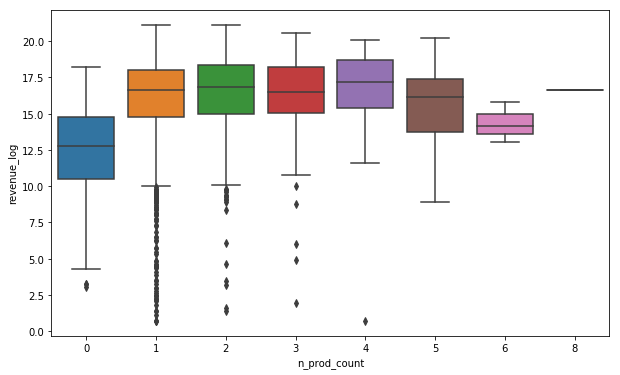

In [139]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = tr_cat.n_prod_count, y = tr_cat.revenue_log)

### original language & spoken langauge

In [140]:
print("spoken language min: {}, max: {}".format(tr_cat.n_spoken_lang.min(), tr_cat.n_spoken_lang.max()))

spoken language min: 0, max: 9


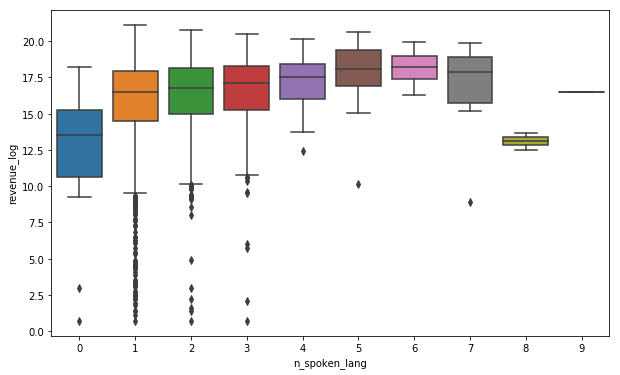

In [141]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = tr_cat.n_spoken_lang, y = tr_cat.revenue_log)

In [142]:
tr_cat.groupby(tr_cat.n_spoken_lang)['revenue_log'].mean()
# mean encoding???


n_spoken_lang
0    12.421699
1    15.835478
2    16.175950
3    16.448364
4    17.235305
5    17.887769
6    18.160038
7    16.458253
8    13.098653
9    16.498231
Name: revenue_log, dtype: float64

In [209]:
tr_cat['spoken_languages'] = tr_cat.spoken_languages.apply(lambda row: row.split(';'))

In [210]:
X = mlb.fit_transform(tr_cat.spoken_languages).astype('int')
mlb.classes_

array(['', 'af', 'am', 'ar', 'bg', 'bn', 'bo', 'ca', 'cn', 'cs', 'da',
       'de', 'el', 'en', 'eo', 'es', 'et', 'eu', 'fa', 'fi', 'fr', 'ga',
       'gd', 'gu', 'he', 'hi', 'hr', 'hu', 'hy', 'id', 'is', 'it', 'ja',
       'kk', 'km', 'ko', 'ku', 'kw', 'la', 'ln', 'lo', 'mi', 'ml', 'mr',
       'my', 'nl', 'no', 'nv', 'ny', 'pa', 'pl', 'ps', 'pt', 'qu', 'ro',
       'ru', 'sa', 'sh', 'si', 'sk', 'so', 'sq', 'sr', 'st', 'sv', 'sw',
       'ta', 'te', 'th', 'tl', 'tr', 'uk', 'ur', 'vi', 'wo', 'xh', 'xx',
       'yi', 'zh', 'zu'], dtype=object)

In [217]:
df_langs = pd.DataFrame(X, columns = mlb.classes_)
df_langs = pd.concat([df_langs.iloc[:, 1:], tr_cat.revenue_log], axis = 1)
df_langs.head()

,af,am,ar,bg,bn,bo,ca,cn,cs,da,...,uk,ur,vi,wo,xh,xx,yi,zh,zu,revenue_log
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.326300
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18.370959
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.387512
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.588099
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.182615


In [250]:
n_langs = df_langs.iloc[:, :-1].sum(axis = 0).astype('int').sort_values(ascending = False)
top20_langs = n_langs.head(20).keys()
btm10_langs = n_langs.tail(10).keys()

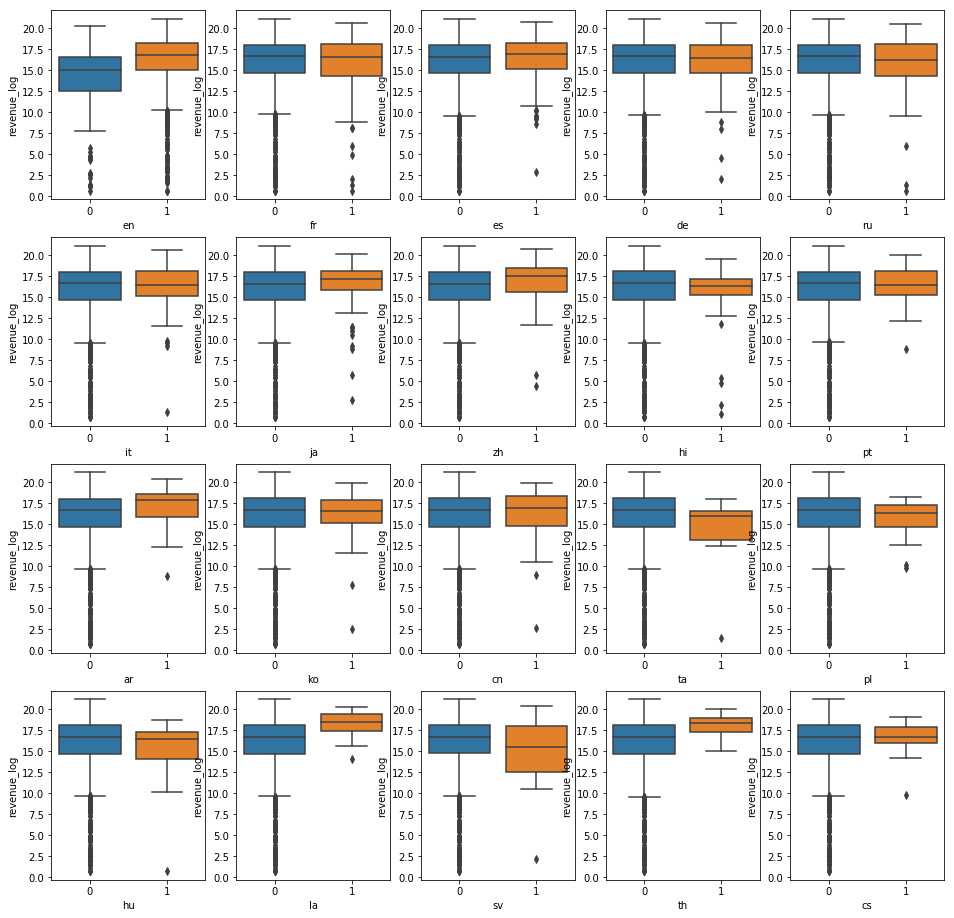

In [256]:
# 10 most frequently spoken languages
plt.figure(figsize = (16, 16))
for i in range(len(top20_langs)):
    a = top20_langs[i]
    plt.subplot(4, 5, i+1)
    sns.boxplot(x = df_langs.loc[:, a], y = df_langs.revenue_log)
plt.show()

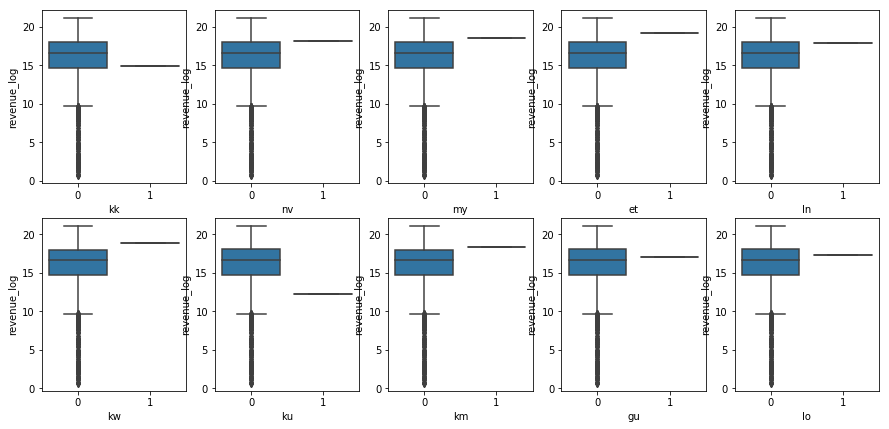

In [249]:
# 10 least frequently spoken languages
plt.figure(figsize = (15, 7))
for i in range(len(btm10_langs)):
    a = btm10_langs[i]
    plt.subplot(2, 5, i+1)
    sns.boxplot(x = df_langs.loc[:, a], y = df_langs.revenue_log)
plt.show()
# Too little data... not gonna use it

In [143]:
# Most common original langauges
lang_top15 = tr_cat.original_language.value_counts().head(15)
lang_top15

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
de      18
ta      16
sv       8
pt       6
nl       6
Name: original_language, dtype: int64

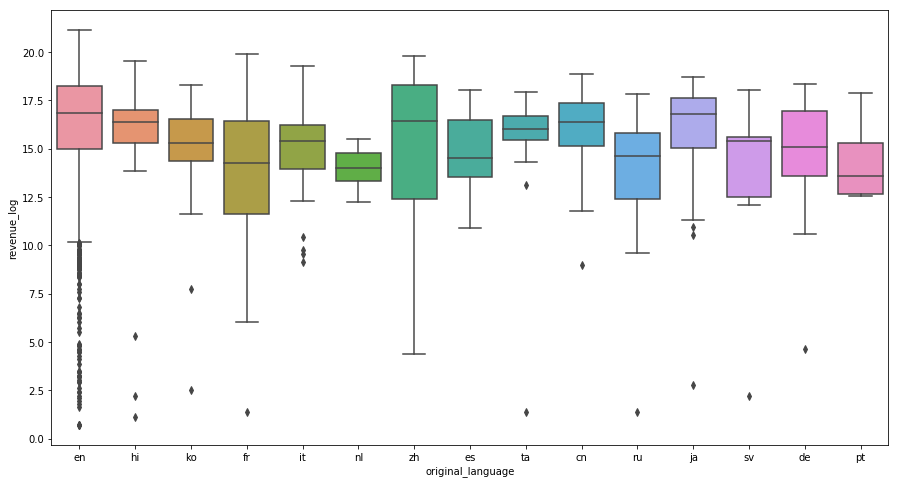

In [144]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'original_language', y = 'revenue_log', data = tr_cat[tr_cat.original_language.isin(lang_top15.index)])

In [257]:
# mean encoding for each original language
lang_avg = tr_cat.groupby(tr_cat.original_language)['revenue_log'].mean()
lang_avg

original_language
ar    14.113946
bn    13.192570
cn    15.720504
cs     9.763881
da    15.040149
de    14.583565
el    15.894952
en    16.213372
es    14.645972
fa    12.432524
fi    13.940353
fr    13.721944
he    16.224782
hi    15.383697
hu    11.267245
id    14.781433
it    14.610319
ja    15.819796
ko    14.565876
ml    13.253550
mr    15.297115
nb    15.240948
nl    13.977457
no    12.516181
pl    16.524099
pt    14.296583
ro    11.567506
ru    13.821259
sr    12.169746
sv    13.419896
ta    15.091309
te    15.620590
tr    15.384035
ur    13.377216
vi    13.367661
zh    15.246869
Name: revenue_log, dtype: float64

In [146]:
# Is English an factor to the revenue??
tr_cat['lang_is_en'] = tr_cat.spoken_languages.isin(['en;'])

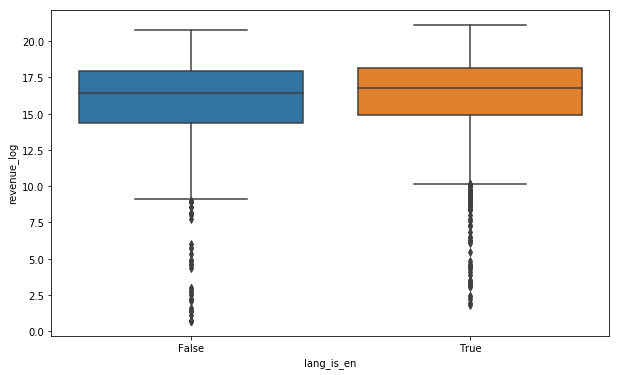

In [147]:
plt.figure(figsize = (10 , 6))
sns.boxplot(x = tr_cat.lang_is_en, y = tr_cat.revenue_log)

In [148]:
tr_cat.groupby(tr_cat.lang_is_en)['revenue_log'].mean()

lang_is_en
False    15.725110
True     16.134022
Name: revenue_log, dtype: float64

### production_companies

In [149]:
tr_cat.n_prod_comp.min(), tr_cat.n_prod_comp.max()

(0, 17)

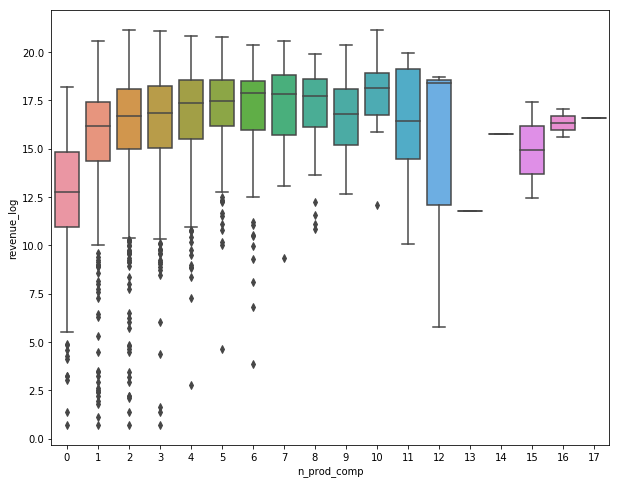

In [150]:
plt.figure(figsize = (10, 8))
sns.boxplot(tr_cat.n_prod_comp, tr_cat.revenue_log)

In [151]:
tr_cat.groupby(tr_cat.n_prod_comp)['revenue_log'].mean()

n_prod_comp
0     12.469561
1     15.524778
2     16.096812
3     16.245040
4     16.704832
5     17.045192
6     16.809689
7     17.197220
8     16.923155
9     16.698257
10    17.502369
11    16.229122
12    14.275258
13    11.747713
14    15.741342
15    14.910898
16    16.334977
17    16.566377
Name: revenue_log, dtype: float64

In [152]:
# production companies missing values
tr_cat.production_companies.head()

0    Paramount Pictures;United Artists;Metro-Goldwy...
1                                Walt Disney Pictures;
2    Bold Films;Blumhouse Productions;Right of Way ...
3                                                  NaN
4                                                  NaN
Name: production_companies, dtype: object

In [153]:
tr_cat.production_companies.isnull().sum()

156

In [154]:
# production companies vs revenue_log

### is_collection

In [155]:
tr_cat.is_collection.isnull().sum()

0

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



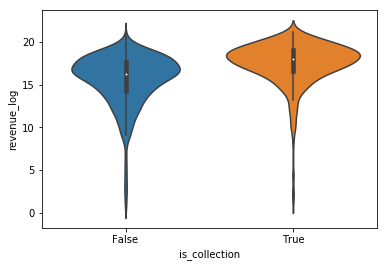

In [156]:
sns.violinplot(tr_cat.is_collection, tr_cat.revenue_log)

In [157]:
tr_cat.groupby(tr_cat.is_collection)['revenue_log'].mean()

is_collection
False    15.582058
True     17.522704
Name: revenue_log, dtype: float64

### status

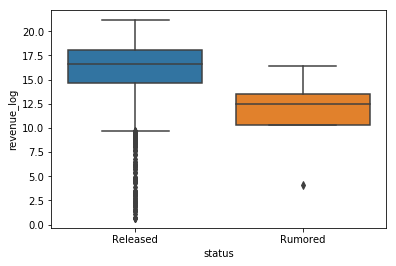

In [158]:
sns.boxplot(tr_cat.status, tr_cat.revenue_log)

In [159]:
tr_cat.groupby(tr_cat.status)['revenue_log'].mean()

status
Released    15.978952
Rumored     11.346014
Name: revenue_log, dtype: float64

### release date

In [328]:
print('revenue range from {} to {}'.format(tr_cat.release_date.min(), tr_cat.release_date.max()))

revenue range from 1921-01-21 to 2017-07-20


In [346]:
tr_cat['year_avg'] = tr_cat.groupby(['year'])['revenue_log'].transform('mean')
tr_cat['year_count'] = tr_cat.groupby('year')['revenue'].transform('count')

In [347]:
tr_cat2 = tr_cat.set_index('release_date').sort_index()
tr_cat2.head()

,genres,original_language,production_companies,production_countries,spoken_languages,status,is_collection,is_homepage,n_genres,n_prod_comp,...,n_crew_job,year,month,day,weekofday,quarter,revenue,revenue_log,year_avg,year_count
release_date,,,,,,,,,,,,,,,,,,,,,
1921-01-21,Comedy;Drama;,en,Charles Chaplin Productions;First National Pic...,US;,"[xx, ]",Released,False,False,2,2,...,11,1921,1,21,4,1,2500000,14.731802,14.731802,1
1924-03-18,Action;Adventure;Drama;Family;Fantasy;,en,Douglas Fairbanks Pictures;,US;,"[xx, ]",Released,False,False,5,1,...,26,1924,3,18,1,1,1213880,14.009333,14.009333,1
1925-08-26,Romance;Drama;,en,Metro-Goldwyn-Mayer (MGM);An Erich von Strohei...,US;,"[en, ]",Released,False,False,2,2,...,9,1925,8,26,2,3,1,0.693147,5.704903,2
1925-12-24,Drama;History;,ru,Goskino Productions;Mosfilm;,RU;,"[ru, ]",Released,False,False,2,2,...,13,1925,12,24,3,4,45100,10.716660,5.704903,2
1926-05-14,Drama;,en,Pickford Corporation;,US;,"[en, ]",Released,False,False,1,1,...,4,1926,5,14,4,2,966878,13.781829,13.781829,1


In [348]:
trace_1 = go.Scatter(x = tr_cat2.index, y= tr_cat2.revenue_log, 
                     mode = 'lines', name = 'revenue', 
                    opacity = .5)
trace_2 = go.Scatter(x = tr_cat2.index, y = tr_cat2.year_avg, 
                     mode = 'lines', name = 'average revenue')
layout = go.Layout(title = 'Revenue per year',
                   xaxis = dict(title = 'time'), 
                   yaxis = dict(title = 'revenue_log'))
fig = go.Figure([trace_1, trace_2], layout)
iplot(fig)

In [367]:
trace_1 = go.Scatter(x = tr_cat2.index, y = tr_cat2.year_count, 
                     mode = 'lines', name = 'movie counts')
trace_2 = go.Scatter(x = tr_cat2.index, y = tr_cat2.year_avg, 
                    mode = 'lines', name = 'average revenue', 
                    yaxis = 'y2')
layout = go.Layout(title = '# of movies per year', 
                  xaxis = dict(title = 'time'), 
                  yaxis = dict(title = 'count'), 
                  yaxis2 = dict(title = 'avg_revenue', 
                                overlaying = 'y', side = 'right'))
fig = go.Figure([trace_1, trace_2], layout)
iplot(fig)

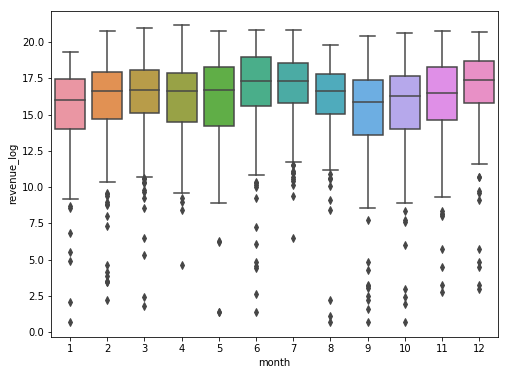

In [357]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = tr_cat.month, y = tr_cat.revenue_log)

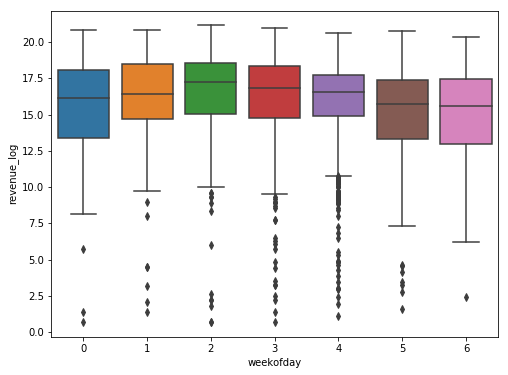

In [355]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = tr_cat.weekofday, y = tr_cat.revenue_log)

### cast & crew 

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



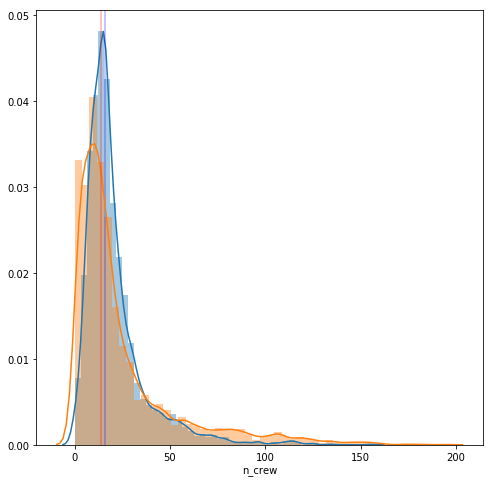

In [160]:
plt.figure(figsize = (8, 8))
sns.distplot(tr_cat.n_cast)
plt.axvline(x = tr_cat.n_cast.median(), color = 'blue', alpha = .3)

sns.distplot(tr_cat.n_crew)
plt.axvline(x = tr_cat.n_crew.median(), color = 'red', alpha = .3)

plt.show()

In [162]:
tr_cat['n_cast_log'] = np.log1p(tr_cat.n_cast)
tr_cat['n_crew_log'] = np.log1p(tr_cat.n_crew)
tr_cat['n_crew_job_log'] = np.log1p(tr_cat.n_crew_job)

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



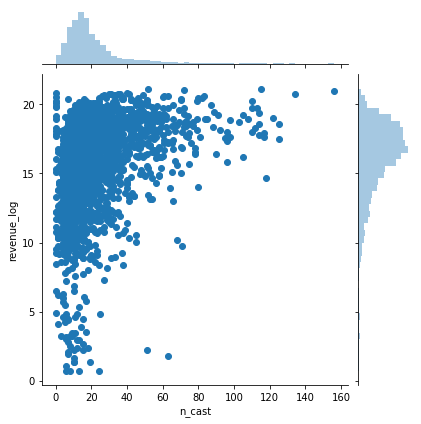

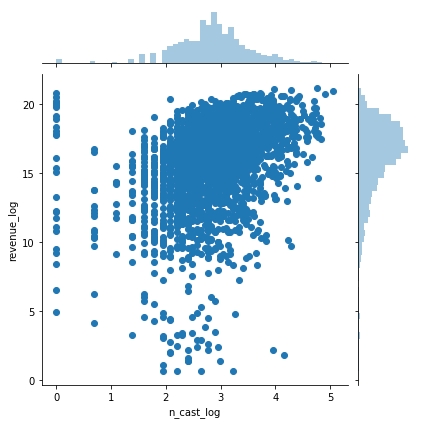

In [190]:
sns.jointplot(x = tr_cat['n_cast'], y = tr_cat.revenue_log, kind = 'scatter')
sns.jointplot(x = tr_cat['n_cast_log'], y = tr_cat.revenue_log, kind = 'scatter')

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



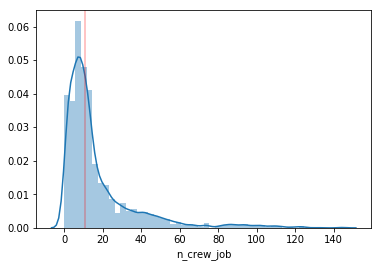

In [163]:
sns.distplot(tr_cat.n_crew_job)
plt.axvline(x = tr_cat.n_crew_job.median(), color = 'red', alpha = .3)

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



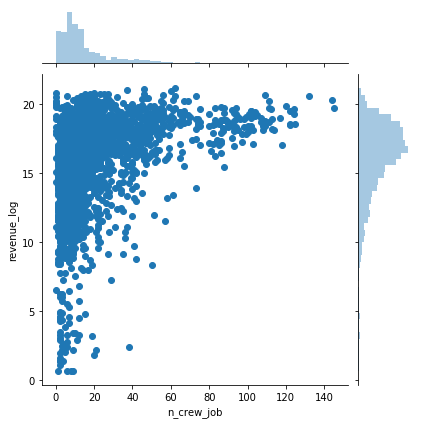

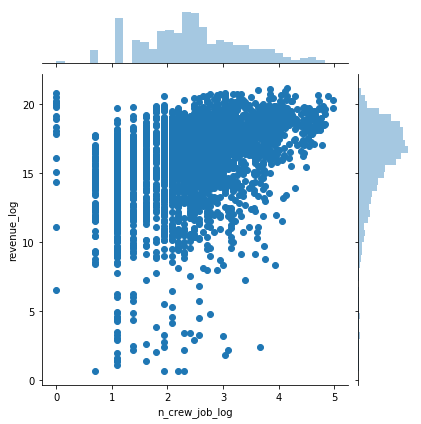

In [185]:
sns.jointplot(x = tr_cat['n_crew_job'], y = tr_cat.revenue_log, kind = 'scatter')
sns.jointplot(x = tr_cat['n_crew_job_log'], y = tr_cat.revenue_log, kind = 'scatter')

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



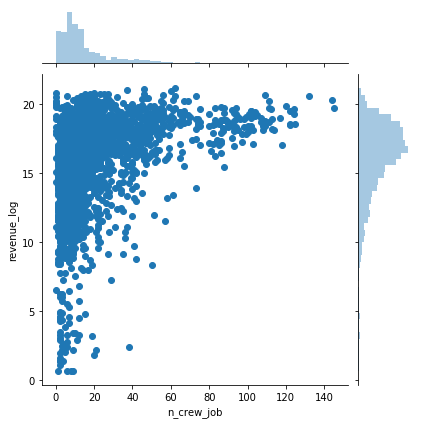

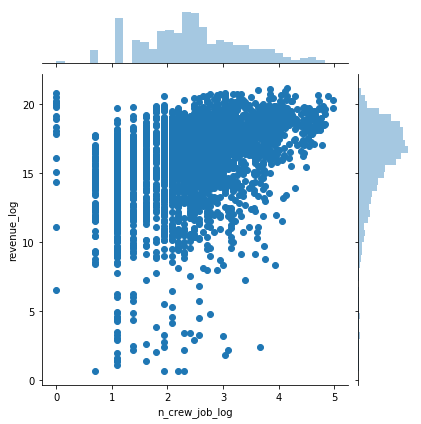

In [186]:
sns.jointplot(x = tr_cat['n_crew_job'], y = tr_cat.revenue_log, kind = 'scatter')
sns.jointplot(x = tr_cat['n_crew_job_log'], y = tr_cat.revenue_log, kind = 'scatter')